**Data Wrangling**

In [1]:
## Starter code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The following statements should get the three data files loaded as DataFrames. 

airlines = pd.read_csv("../resource/asnlib/publicdata/airlines.csv")
airports = pd.read_csv("../resource/asnlib/publicdata/airports.csv")
flights  = pd.read_csv("https://www3.nd.edu/~jng2/flights_20_perc.csv",parse_dates=[['YEAR', 'MONTH','DAY']]) 
# the flights file is ~140mb so will take a few seconds to load

In [2]:
# load package
import datetime, warnings, scipy

In [3]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
flights.head(20)

,YEAR_MONTH_DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-10-14,3,UA,356,N494UA,11618,13930,1945,1948.0,3.0,...,2104.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-27,2,MQ,3458,N671MQ,ORD,MLI,820,933.0,73.0,...,1100.0,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0
2,2015-07-06,1,B6,1202,N535JB,FLL,JFK,1507,1522.0,15.0,...,1809.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-13,6,DL,2529,N301DQ,ATL,CLE,2204,2204.0,0.0,...,2343.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-06,6,WN,2560,N7729A,CLT,BWI,1325,1335.0,10.0,...,1459.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-03-21,6,WN,3550,N914WN,MDW,BOS,1950,2022.0,32.0,...,2320.0,20.0,0,0,NaN,0.0,0.0,6.0,14.0,0.0
6,2015-07-29,3,WN,1214,N415WN,DEN,FLL,1130,1145.0,15.0,...,1735.0,15.0,0,0,NaN,0.0,0.0,15.0,0.0,0.0
7,2015-04-13,1,NK,711,N627NK,MYR,LGA,1412,1402.0,-10.0,...,1613.0,16.0,0,0,NaN,16.0,0.0,0.0,0.0,0.0
8,2015-09-25,5,AS,837,N472AS,SJC,HNL,900,857.0,-3.0,...,1140.0,15.0,0,0,NaN,15.0,0.0,0.0,0.0,0.0
9,2015-11-10,2,EV,6165,N12567,ORD,PIA,905,859.0,-6.0,...,946.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure

# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(flights, col):    
    liste = []
    for index, cols in flights[['YEAR_MONTH_DAY', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [7]:
flights['SCHEDULED_DEPARTURE'] = create_flight_time(flights, 'SCHEDULED_DEPARTURE')
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(format_heure)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(format_heure)
flights['ARRIVAL_TIME'] = flights['ARRIVAL_TIME'].apply(format_heure)

In [8]:
flights.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-10-14 19:45:00,21:24:00,19:48:00,21:04:00,3.0,-20.0
1,2015-01-27 08:20:00,09:13:00,09:33:00,11:00:00,73.0,107.0
2,2015-07-06 15:07:00,18:13:00,15:22:00,18:09:00,15.0,-4.0
3,2015-06-13 22:04:00,23:52:00,22:04:00,23:43:00,0.0,-9.0
4,2015-06-06 13:25:00,15:00:00,13:35:00,14:59:00,10.0,-1.0
5,2015-03-21 19:50:00,23:00:00,20:22:00,23:20:00,32.0,20.0


In [9]:
# I extra the column needed for analysis and named nd
df = flights[['YEAR_MONTH_DAY','FLIGHT_NUMBER','AIRLINE', 'ORIGIN_AIRPORT','DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY','CANCELLED',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]
df[:5]

,YEAR_MONTH_DAY,FLIGHT_NUMBER,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,SCHEDULED_TIME,ELAPSED_TIME
0,2015-10-14,356,UA,11618,13930,2015-10-14 19:45:00,19:48:00,3.0,21:24:00,21:04:00,-20.0,0,159.0,136.0
1,2015-01-27,3458,MQ,ORD,MLI,2015-01-27 08:20:00,09:33:00,73.0,09:13:00,11:00:00,107.0,0,53.0,87.0
2,2015-07-06,1202,B6,FLL,JFK,2015-07-06 15:07:00,15:22:00,15.0,18:13:00,18:09:00,-4.0,0,186.0,167.0
3,2015-06-13,2529,DL,ATL,CLE,2015-06-13 22:04:00,22:04:00,0.0,23:52:00,23:43:00,-9.0,0,108.0,99.0
4,2015-06-06,2560,WN,CLT,BWI,2015-06-06 13:25:00,13:35:00,10.0,15:00:00,14:59:00,-1.0,0,95.0,84.0


In [10]:
# Then I check for nan and how complete the dataset is.
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ARRIVAL_DELAY,21248,98.174282
1,ELAPSED_TIME,21248,98.174282
2,ARRIVAL_TIME,18704,98.392873
3,DEPARTURE_TIME,17426,98.502684
4,DEPARTURE_DELAY,17426,98.502684
5,SCHEDULED_TIME,2,99.999828
6,YEAR_MONTH_DAY,0,100.000000
7,FLIGHT_NUMBER,0,100.000000
8,AIRLINE,0,100.000000
9,ORIGIN_AIRPORT,0,100.000000


In [11]:
# We see the variables filling factor is quite good(>97%). So I just simply remove the entries contains 
# missing value
df.dropna(inplace = True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Then I check again
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,YEAR_MONTH_DAY,0,100.0
1,FLIGHT_NUMBER,0,100.0
2,AIRLINE,0,100.0
3,ORIGIN_AIRPORT,0,100.0
4,DESTINATION_AIRPORT,0,100.0
5,SCHEDULED_DEPARTURE,0,100.0
6,DEPARTURE_TIME,0,100.0
7,DEPARTURE_DELAY,0,100.0
8,SCHEDULED_ARRIVAL,0,100.0
9,ARRIVAL_TIME,0,100.0


**PROBLEM 1**

Do flight delays happen more often later in the day compared to earlier in the day?

> 1. I define problem 1 is the flight delays according to scheduled _departure time.
2. If the departure_delay >0, then I can define the flight is delay.
3. If the hour of the day <= 12, then I can define it's early of the day.
4. If the hour of the day >= 12, then I can define it's late of the day.
5. If the number of flight delay later in the day more than flight delay earlier in the day, I can say flight delays happen more often later in the day compared to earlier in the day.

In [13]:
df.head(5)

,YEAR_MONTH_DAY,FLIGHT_NUMBER,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,SCHEDULED_TIME,ELAPSED_TIME
0,2015-10-14,356,UA,11618,13930,2015-10-14 19:45:00,19:48:00,3.0,21:24:00,21:04:00,-20.0,0,159.0,136.0
1,2015-01-27,3458,MQ,ORD,MLI,2015-01-27 08:20:00,09:33:00,73.0,09:13:00,11:00:00,107.0,0,53.0,87.0
2,2015-07-06,1202,B6,FLL,JFK,2015-07-06 15:07:00,15:22:00,15.0,18:13:00,18:09:00,-4.0,0,186.0,167.0
3,2015-06-13,2529,DL,ATL,CLE,2015-06-13 22:04:00,22:04:00,0.0,23:52:00,23:43:00,-9.0,0,108.0,99.0
4,2015-06-06,2560,WN,CLT,BWI,2015-06-06 13:25:00,13:35:00,10.0,15:00:00,14:59:00,-1.0,0,95.0,84.0


In [14]:
maskdelay = df['DEPARTURE_DELAY']>0
day_delay = df[maskdelay]
day_delay.head()

,YEAR_MONTH_DAY,FLIGHT_NUMBER,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,SCHEDULED_TIME,ELAPSED_TIME
0,2015-10-14,356,UA,11618,13930,2015-10-14 19:45:00,19:48:00,3.0,21:24:00,21:04:00,-20.0,0,159.0,136.0
1,2015-01-27,3458,MQ,ORD,MLI,2015-01-27 08:20:00,09:33:00,73.0,09:13:00,11:00:00,107.0,0,53.0,87.0
2,2015-07-06,1202,B6,FLL,JFK,2015-07-06 15:07:00,15:22:00,15.0,18:13:00,18:09:00,-4.0,0,186.0,167.0
4,2015-06-06,2560,WN,CLT,BWI,2015-06-06 13:25:00,13:35:00,10.0,15:00:00,14:59:00,-1.0,0,95.0,84.0
5,2015-03-21,3550,WN,MDW,BOS,2015-03-21 19:50:00,20:22:00,32.0,23:00:00,23:20:00,20.0,0,130.0,118.0


In [15]:
import time
import datetime
day_delay['Hours'] = [elem.time().strftime('%H') for elem
                     in day_delay['SCHEDULED_DEPARTURE']]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
day_delay.head()

,YEAR_MONTH_DAY,FLIGHT_NUMBER,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,SCHEDULED_TIME,ELAPSED_TIME,Hours
0,2015-10-14,356,UA,11618,13930,2015-10-14 19:45:00,19:48:00,3.0,21:24:00,21:04:00,-20.0,0,159.0,136.0,19
1,2015-01-27,3458,MQ,ORD,MLI,2015-01-27 08:20:00,09:33:00,73.0,09:13:00,11:00:00,107.0,0,53.0,87.0,08
2,2015-07-06,1202,B6,FLL,JFK,2015-07-06 15:07:00,15:22:00,15.0,18:13:00,18:09:00,-4.0,0,186.0,167.0,15
4,2015-06-06,2560,WN,CLT,BWI,2015-06-06 13:25:00,13:35:00,10.0,15:00:00,14:59:00,-1.0,0,95.0,84.0,13
5,2015-03-21,3550,WN,MDW,BOS,2015-03-21 19:50:00,20:22:00,32.0,23:00:00,23:20:00,20.0,0,130.0,118.0,19


In [17]:
# Then if scheduled _departure time <=12, I can define it is earlier in the day
# If 12<scheduled _departure time <=24, it's late in the day.
day_delay['Hours'] = day_delay['Hours'].astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
mask_dayearly = day_delay['Hours']<=12
mask_daylate = day_delay['Hours']>12

In [19]:
earlyday_delay_number = day_delay[mask_dayearly]['Hours'].count()
earlyday_delay_number

153180

In [20]:
lateday_delay_number = day_delay[mask_daylate]['Hours'].count()
lateday_delay_number

268811

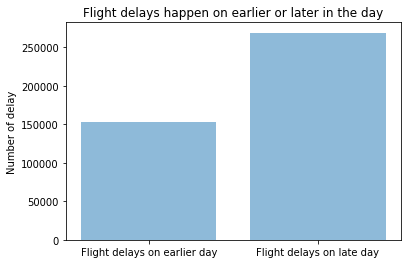

In [21]:
objects = ('Flight delays on earlier day','Flight delays on late day')
y_pos = np.arange(len(objects))
performance = [earlyday_delay_number,lateday_delay_number]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of delay')
plt.title('Flight delays happen on earlier or later in the day')

plt.show()

**Conclusion**

> Now, We can easily see the number of flight delays on later in the day are much larger than the flight delays on earlier in the day!

> So, we can conclude that flight delays happen more often later in the day compared to earlier in the day

**PROBLEM 2**

Does the response to Claim 1 depend on the month of the year?

>I will use the hypothesis for Claim 1 used in problem 1 and group by month. 

> Then I will draw the plot to see the fluctuation of two lines of the number of flights delay on early in the day and the number of flights delay on later in the day. 

> Finally, based on the plot, I will decide whether it is depend on the month of the year.

In [22]:
day_delay.head()

,YEAR_MONTH_DAY,FLIGHT_NUMBER,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,SCHEDULED_TIME,ELAPSED_TIME,Hours
0,2015-10-14,356,UA,11618,13930,2015-10-14 19:45:00,19:48:00,3.0,21:24:00,21:04:00,-20.0,0,159.0,136.0,19
1,2015-01-27,3458,MQ,ORD,MLI,2015-01-27 08:20:00,09:33:00,73.0,09:13:00,11:00:00,107.0,0,53.0,87.0,8
2,2015-07-06,1202,B6,FLL,JFK,2015-07-06 15:07:00,15:22:00,15.0,18:13:00,18:09:00,-4.0,0,186.0,167.0,15
4,2015-06-06,2560,WN,CLT,BWI,2015-06-06 13:25:00,13:35:00,10.0,15:00:00,14:59:00,-1.0,0,95.0,84.0,13
5,2015-03-21,3550,WN,MDW,BOS,2015-03-21 19:50:00,20:22:00,32.0,23:00:00,23:20:00,20.0,0,130.0,118.0,19


In [23]:
day_delay['Month'] = [elem.date().strftime('%m') for elem
                     in day_delay['SCHEDULED_DEPARTURE']]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
day_delay.head(5)

,YEAR_MONTH_DAY,FLIGHT_NUMBER,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,SCHEDULED_TIME,ELAPSED_TIME,Hours,Month
0,2015-10-14,356,UA,11618,13930,2015-10-14 19:45:00,19:48:00,3.0,21:24:00,21:04:00,-20.0,0,159.0,136.0,19,10
1,2015-01-27,3458,MQ,ORD,MLI,2015-01-27 08:20:00,09:33:00,73.0,09:13:00,11:00:00,107.0,0,53.0,87.0,8,01
2,2015-07-06,1202,B6,FLL,JFK,2015-07-06 15:07:00,15:22:00,15.0,18:13:00,18:09:00,-4.0,0,186.0,167.0,15,07
4,2015-06-06,2560,WN,CLT,BWI,2015-06-06 13:25:00,13:35:00,10.0,15:00:00,14:59:00,-1.0,0,95.0,84.0,13,06
5,2015-03-21,3550,WN,MDW,BOS,2015-03-21 19:50:00,20:22:00,32.0,23:00:00,23:20:00,20.0,0,130.0,118.0,19,03


In [25]:
late_month_counts = day_delay[mask_daylate].groupby(['Month'])[['Hours']].count()
late_month_counts.rename(columns = {'Hours':'num_later_day_delay_flights'},inplace=True)

In [26]:
early_month_counts = day_delay[mask_dayearly].groupby(['Month'])[['Hours']].count()
early_month_counts.rename(columns = {'Hours':'num_early_day_delay_flights'},inplace=True)

In [27]:
delay_early_late_by_month = pd.merge(early_month_counts,late_month_counts,left_index= True,right_index = True)
delay_early_late_by_month

,num_early_day_delay_flights,num_later_day_delay_flights
Month,,
01,13143,22130
02,12960,21396
03,13921,24622
04,11925,21073
05,12375,23135
06,15080,27583
07,14529,27071
08,13303,24546
09,9488,16873


Text(0.5,1,'Flight delays happen on later or earlier in the day by month')

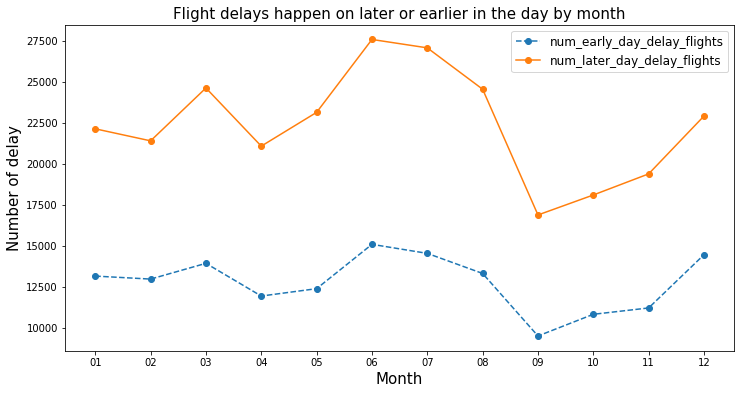

In [28]:
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(delay_early_late_by_month.index, delay_early_late_by_month['num_early_day_delay_flights'], 
          linestyle='--',marker='o')
axes.plot(delay_early_late_by_month.index, delay_early_late_by_month['num_later_day_delay_flights'],marker='o')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of delay',fontsize = 15)
axes.set_xlabel('Month',fontsize = 15)
axes.set_title(label = 'Flight delays happen on later or earlier in the day by month',fontsize = 15)

**Conclusion**

> From the plot, we know that the number of flight delay follow a fixed pattern both in early day and late day.

> Flight delays in all the months happen more often later in the day compared to earlier in the day. 

> So, We can conclude that the month of the year doesn't influence flight delays happen more often later in the day compared to earlier in the day.

**Problem 3**

Does the response to Claim 1 depend on the airline? Which airlines have this phenomenon more pronounced and less pronounced?

> I will use the hypothesis for Claim 1 used in problem 1 and group by airline. 

> Then I will plot two lines of flights delay of early and later in the day to see the pattern. 

>Finally, I will calculate their difference to define whether this phenomenon more pronounced and less pronounced. (Difference = number of flights delay in the late day - number of flights delay in the earlier day)

In [29]:
late_month_counts_by_airline = day_delay[mask_daylate].groupby(['AIRLINE'])[['Hours']].count()
late_month_counts_by_airline.rename(columns = {'Hours':'num_later_day_delay_flights by airline'},inplace=True)

In [30]:
early_month_counts_by_airline = day_delay[mask_dayearly].groupby(['AIRLINE'])[['Hours']].count()
early_month_counts_by_airline.rename(columns = {'Hours':'num_early_day_delay_flights by airline'},inplace=True)

In [31]:
delay_early_late_by_airline = pd.merge(late_month_counts_by_airline,early_month_counts_by_airline,left_index= True,right_index = True)
delay_early_late_by_airline

,num_later_day_delay_flights by airline,num_early_day_delay_flights by airline
AIRLINE,,
AA,30611,18506
AS,5201,3475
B6,14127,6268
DL,35534,20616
EV,20944,12476
F9,4539,2358
HA,2600,1310
MQ,10976,7538
NK,6442,3996


Text(0.5,1,'Flight delays happen on later or earlier in the day by airline')

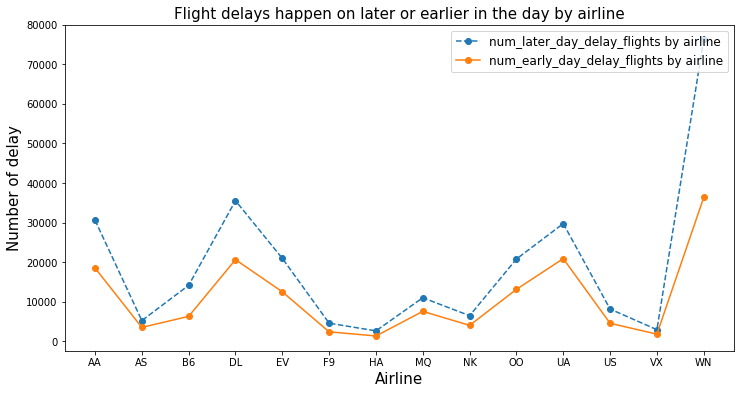

In [32]:
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(delay_early_late_by_airline.index, delay_early_late_by_airline['num_later_day_delay_flights by airline'], 
          linestyle='--',marker='o')
axes.plot(delay_early_late_by_airline.index, delay_early_late_by_airline['num_early_day_delay_flights by airline'],marker='o')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of delay',fontsize = 15)
axes.set_xlabel('Airline',fontsize = 15)
axes.set_title(label = 'Flight delays happen on later or earlier in the day by airline',fontsize = 15)

In [33]:
delay_early_late_by_airline['Difference']=delay_early_late_by_airline['num_later_day_delay_flights by airline']-delay_early_late_by_airline['num_early_day_delay_flights by airline']

In [34]:
delay_early_late_by_airline.sort_values('Difference')

,num_later_day_delay_flights by airline,num_early_day_delay_flights by airline,Difference
AIRLINE,,,
VX,2898,1777,1121
HA,2600,1310,1290
AS,5201,3475,1726
F9,4539,2358,2181
NK,6442,3996,2446
MQ,10976,7538,3438
US,8122,4517,3605
OO,20778,13104,7674
B6,14127,6268,7859


Text(0.5,1,'Number of Difference between late and early(late-early)')

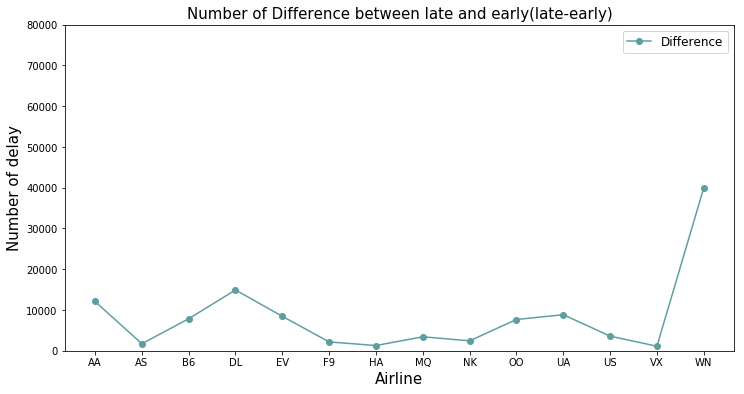

In [35]:
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(delay_early_late_by_airline.index, delay_early_late_by_airline['Difference'], 
          color ='CadetBlue' ,marker='o')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylim(bottom=0,top=80000)
axes.set_ylabel('Number of delay',fontsize = 15,)
axes.set_xlabel('Airline',fontsize = 15)
axes.set_title(label = 'Number of Difference between late and early(late-early)',fontsize = 15)

**Conclusion:**
> From the plot, We can see all difference are above the zero axis, which means flight delays in all the airline happen more often later in the day compared to earlier in the day.

> So, We can conclude that the airline doesn't influence flight delays happen more often later in the day compared to earlier in the day.

> From the difference plot, we can see airline WN has this phenomenon more pronounced and airline VX has the least pronounced.

**Problem 4**

Do flight cancellation happen more often later in the day than earlier in the day?

> First, I set the mask of cancellation and filter it from the flights table.

> Then, I use the hypothesis of later and earlier in the day used in question 1.

> Finally, I will plot bar chart to see the number of cancellation on earlier day and on later day.

In [36]:
flights.head()

,YEAR_MONTH_DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-10-14,3,UA,356,N494UA,11618,13930,2015-10-14 19:45:00,19:48:00,3.0,...,21:04:00,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-27,2,MQ,3458,N671MQ,ORD,MLI,2015-01-27 08:20:00,09:33:00,73.0,...,11:00:00,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0
2,2015-07-06,1,B6,1202,N535JB,FLL,JFK,2015-07-06 15:07:00,15:22:00,15.0,...,18:09:00,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-13,6,DL,2529,N301DQ,ATL,CLE,2015-06-13 22:04:00,22:04:00,0.0,...,23:43:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-06,6,WN,2560,N7729A,CLT,BWI,2015-06-06 13:25:00,13:35:00,10.0,...,14:59:00,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
mask_cancelled = flights['CANCELLED']==1


In [38]:
flights_cancelled = flights[mask_cancelled]


In [39]:
# Extract hours from the scheduled_departure
flights_cancelled['Hours'] = [elem.time().strftime('%H') for elem
                     in flights_cancelled['SCHEDULED_DEPARTURE']]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
flights_cancelled['Hours'] = flights_cancelled['Hours'].astype(int)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
mask_cancel_dayearly = flights_cancelled['Hours']<=12
mask_cancel_daylate = flights_cancelled['Hours']>12

In [42]:
earlyday_cancel_number = flights_cancelled[mask_cancel_dayearly]['Hours'].count()
earlyday_cancel_number

7936

In [43]:
lateday_cancel_number = flights_cancelled[mask_cancel_daylate]['Hours'].count()
lateday_cancel_number

10208

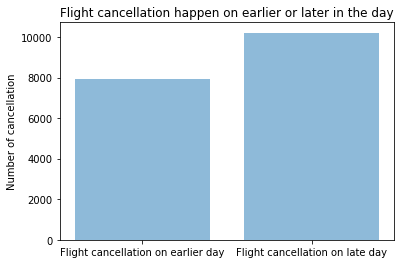

In [44]:
objects = ('Flight cancellation on earlier day','Flight cancellation on late day')
y_pos = np.arange(len(objects))
performance = [earlyday_cancel_number,lateday_cancel_number]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of cancellation')
plt.title('Flight cancellation happen on earlier or later in the day')

plt.show()

**Conclusion:**
> From the plot, we can see that the number of flight cancellation on later day much larger than the flight cancellation on earlier day.

> So, we can conclude that flight cancellation happen more often later in the day than earlier in the day.

**Problem 5**

Does the response to Claim 4 depend on the month of the year and on the airline?

> First, to solve the problem of the month, I will group the cancellation data with the month, then plot it with line graphes.

> To solve the problem of the airline, I will group the cancellation data with the airline, then plot it with two line graphes and difference between two line graphes.

In [45]:
flights_cancelled['Month'] = [elem.date().strftime('%m') for elem
                     in flights_cancelled['SCHEDULED_DEPARTURE']]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
cancel_late_month_counts = flights_cancelled[mask_cancel_daylate].groupby(['Month'])[['Hours']].count()
cancel_late_month_counts.rename(columns = {'Hours':'num_later_day_cancel_flights'},inplace=True)

In [47]:
cancel_early_month_counts = flights_cancelled[mask_cancel_dayearly].groupby(['Month'])[['Hours']].count()
cancel_early_month_counts.rename(columns = {'Hours':'num_earlier_day_cancel_flights'},inplace=True)

In [48]:
cancel_early_late_by_month = pd.merge(cancel_late_month_counts,cancel_early_month_counts,left_index= True,right_index = True)
cancel_early_late_by_month

,num_later_day_cancel_flights,num_earlier_day_cancel_flights
Month,,
01,1267,1162
02,2192,1970
03,1146,1017
04,466,390
05,673,451
06,1190,676
07,612,395
08,614,393
09,256,159


Text(0.5,1,'Flight cancellation happen on earlier or later in the day by month')

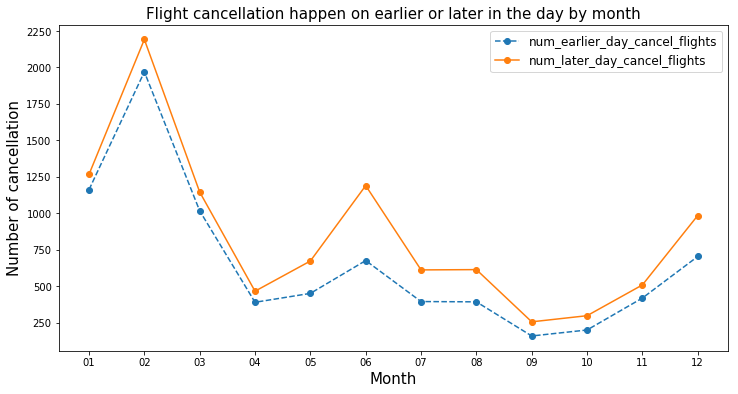

In [49]:
# Cancellation groupby month
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(cancel_early_late_by_month.index, cancel_early_late_by_month['num_earlier_day_cancel_flights'], 
          linestyle='--',marker='o')
axes.plot(cancel_early_late_by_month.index, cancel_early_late_by_month['num_later_day_cancel_flights'],
marker='o')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of cancellation',fontsize = 15)
axes.set_xlabel('Month',fontsize = 15)
axes.set_title(label = 'Flight cancellation happen on earlier or later in the day by month',fontsize = 15)

In [50]:
cancel_late_month_counts_by_airline = flights_cancelled[mask_cancel_daylate].groupby(['AIRLINE'])[['Hours']].count()
cancel_late_month_counts_by_airline.rename(columns = {'Hours':'num_later_day_cancel_flights by airline'},inplace=True)
cancel_early_month_counts_by_airline = flights_cancelled[mask_cancel_dayearly].groupby(['AIRLINE'])[['Hours']].count()
cancel_early_month_counts_by_airline.rename(columns = {'Hours':'num_early_day_cancel_flights by airline'},inplace=True)
cancel_early_late_by_airline = pd.merge(cancel_late_month_counts_by_airline,cancel_early_month_counts_by_airline,left_index= True,right_index = True)
cancel_early_late_by_airline

,num_later_day_cancel_flights by airline,num_early_day_cancel_flights by airline
AIRLINE,,
AA,1145,1021
AS,75,80
B6,492,395
DL,413,336
EV,1900,1168
F9,78,45
HA,23,13
MQ,1776,1261
NK,242,163


Text(0.5,1,'Flight cancellation happen on later or earlier in the day by airline')

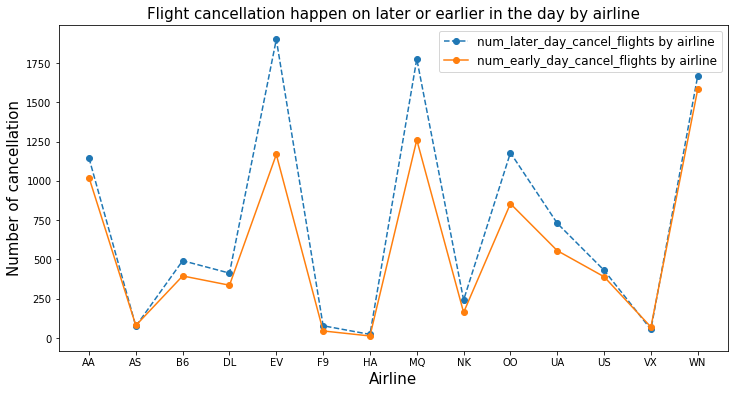

In [51]:
# Cancellation groupby airline
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(cancel_early_late_by_airline.index, cancel_early_late_by_airline['num_later_day_cancel_flights by airline'], 
          linestyle='--',marker='o')
axes.plot(cancel_early_late_by_airline.index, cancel_early_late_by_airline['num_early_day_cancel_flights by airline'],marker='o')
axes.legend(loc = 'upper right',fontsize = 12)

axes.set_ylabel('Number of cancellation',fontsize = 15)
axes.set_xlabel('Airline',fontsize = 15)
axes.set_title(label = 'Flight cancellation happen on later or earlier in the day by airline',fontsize = 15)

In [52]:
cancel_early_late_by_airline['Difference']=cancel_early_late_by_airline['num_later_day_cancel_flights by airline']-cancel_early_late_by_airline['num_early_day_cancel_flights by airline']
cancel_early_late_by_airline

,num_later_day_cancel_flights by airline,num_early_day_cancel_flights by airline,Difference
AIRLINE,,,
AA,1145,1021,124
AS,75,80,-5
B6,492,395,97
DL,413,336,77
EV,1900,1168,732
F9,78,45,33
HA,23,13,10
MQ,1776,1261,515
NK,242,163,79


Text(0.5,1,'Flight cancellation happen on later or earlier in the day by airline')

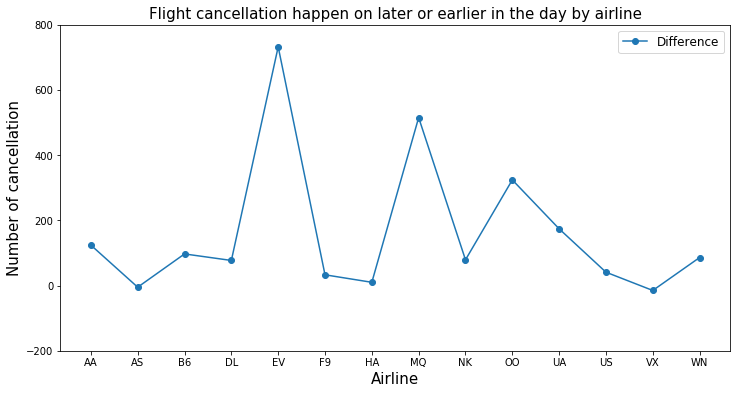

In [53]:
# Difference by airline 
figure, axes = plt.subplots(figsize = (12,6))
axes.plot(cancel_early_late_by_airline.index, cancel_early_late_by_airline['Difference'],marker='o')
axes.legend(loc = 'upper right',fontsize = 12)
axes.set_ylim(bottom=-200,top=800)
axes.set_ylabel('Number of cancellation',fontsize = 15)
axes.set_xlabel('Airline',fontsize = 15)
axes.set_title(label = 'Flight cancellation happen on later or earlier in the day by airline',fontsize = 15)

**Conclusion**
> For the flight cancellation by month,  the month of the year doesn't influence the flight cancellation happen more often later in the day than earlier in the day.

> For the flight cancellation by airline, the number of cancellation in the earlier day actually higher than the number of cancellation in the later day.

> For the plot of difference by airline, we can see the airline AS, VX are below the zero axis. 

> Now we can conclude that Claim 4 not depend on the month of the year, but depend on the airline

**Problem 6**

State based analysis: What are the top three states with lowest average flight delay? What are the top three states with highest average flight delay? Come up with qualitative (and/or quantitative) reason for why you think these states are lowest and highest flight delays.

> For the question of the top three states with lowest/highest average flight delay, I will group by the states and calculate the all the reason for the delay and add it together.Finally, I will use line chart to prove it. 

> For the question of why think these states are lowest and highest flight delays, I will analyze which part will lead to the low/high number of delay.


First, we need to merge flights table and airports table together by the IATA_CODE and ORIGINAL_AIRPORT. 

In [54]:
flights.head()

,YEAR_MONTH_DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-10-14,3,UA,356,N494UA,11618,13930,2015-10-14 19:45:00,19:48:00,3.0,...,21:04:00,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-27,2,MQ,3458,N671MQ,ORD,MLI,2015-01-27 08:20:00,09:33:00,73.0,...,11:00:00,107.0,0,0,NaN,34.0,0.0,0.0,63.0,10.0
2,2015-07-06,1,B6,1202,N535JB,FLL,JFK,2015-07-06 15:07:00,15:22:00,15.0,...,18:09:00,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-06-13,6,DL,2529,N301DQ,ATL,CLE,2015-06-13 22:04:00,22:04:00,0.0,...,23:43:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-06-06,6,WN,2560,N7729A,CLT,BWI,2015-06-06 13:25:00,13:35:00,10.0,...,14:59:00,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [56]:
# First, we need to merge flights table and airports table together 
# by the IATA_CODE and ORIGINAL_AIRPORT
flights_merge = pd.merge(flights,airports,how='left', right_on='IATA_CODE', left_on='ORIGIN_AIRPORT')
flights_merge.head()

,YEAR_MONTH_DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015-10-14,3,UA,356,N494UA,11618,13930,2015-10-14 19:45:00,19:48:00,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-27,2,MQ,3458,N671MQ,ORD,MLI,2015-01-27 08:20:00,09:33:00,73.0,...,0.0,63.0,10.0,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446
2,2015-07-06,1,B6,1202,N535JB,FLL,JFK,2015-07-06 15:07:00,15:22:00,15.0,...,NaN,NaN,NaN,FLL,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275
3,2015-06-13,6,DL,2529,N301DQ,ATL,CLE,2015-06-13 22:04:00,22:04:00,0.0,...,NaN,NaN,NaN,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694
4,2015-06-06,6,WN,2560,N7729A,CLT,BWI,2015-06-06 13:25:00,13:35:00,10.0,...,NaN,NaN,NaN,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313


In [58]:
reason_delay = flights_merge.groupby(['AIRLINE'])[['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']].mean()

In [59]:
# AS, GU, WA are the top three states with lowest average flight delay
reason_delay['Total_mean_delay'] = reason_delay['AIR_SYSTEM_DELAY']+reason_delay['SECURITY_DELAY']+reason_delay['AIRLINE_DELAY']+reason_delay['LATE_AIRCRAFT_DELAY']+reason_delay['WEATHER_DELAY']
reason_delay.sort_values('Total_mean_delay',inplace = True)
reason_delay.head(3)

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Total_mean_delay
AIRLINE,,,,,,
HA,0.719535,0.030006,21.323944,14.112676,1.284752,37.470912
AS,13.820115,0.270270,15.859548,16.672796,1.432654,48.055383
US,16.247548,0.173978,17.476022,14.124659,1.827384,49.849591


Reason for the lowest average flight delay is that because they have low weather _delay, low air_system_delay and low Secirity_delay.

In [60]:
# ME,AR,DE are the top three states with highest average flight delay
reason_delay.sort_values('Total_mean_delay',ascending = False).head(3)

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Total_mean_delay
AIRLINE,,,,,,
F9,25.237460,0.000000,15.042116,25.504339,0.544974,66.328889
UA,14.289032,0.006909,21.632761,25.985798,3.019144,64.933644
NK,28.293196,0.222109,13.590454,20.536631,1.283911,63.926302


Reason for the highest average flight delay is that because they have high air_system_delay and high LATE_AIRCRAFT_DELAY.

Text(0.5,0,'State')

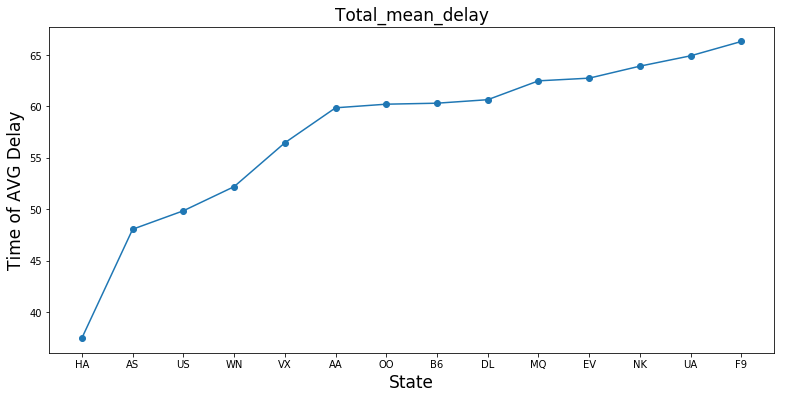

In [62]:
figure, axes = plt.subplots(figsize = (13,6))
axes.plot(reason_delay.index, reason_delay['Total_mean_delay'],marker = 'o')
axes.set_title(label = 'Total_mean_delay',fontsize =17)
axes.set_ylabel('Time of AVG Delay',fontsize =17)
axes.set_xlabel('State',fontsize =17)


**Conclusion:**
>Now, we can easily conclude the first two question: 
1. WY, MT, HI are the top three states with lowest average flight delay
2. DE, WV, IL are the top three states with highest average flight delay
3. Reason for lowest average flight delay because of low weather _delay, low air_system_delay and low Secirity_delay.
4. Reason for highest average flight delay because of high air_system_delay and high LATE_AIRCRAFT_DELAY.

**Problem 7** 

Taxi time in the flight is most frustrating experience to me. Can you let me know which airports I should avoid and which ones I should prefer? Answer this based on average taxi time (both taxi in and taxi out)?

Before answering the question, I found 2 questions need to deal with first.

>First, I found it exists number in both of the DESTINATION_AIRPORT and the ORIGIN_AIRPORT. So, I will first drop these rows.

>Then, I need to find out what's TAXI_OUT and TAXI_IN mean.

>I found the defination of TAXI_OUT and TAXI_IN on kaggle.
1. TAXI_OUT:The time duration elapsed between departure from the origin airport gate and wheels off
2. TAXI_IN: The time duration elapsed between wheels-on and gate arrival at the destination airport

>So, I group DESTINATION_AIRPORT with TAXI_IN together and group ORIGIN_AIRPORT with TAXI_OUT together and calculate their mean of the taxi time to figure out which airport should we avoid or prefer when we want to take a plane, and which airport should we avoid or prefer when we choose to arrive.

In [63]:
p7_taxiin = flights[['DESTINATION_AIRPORT','TAXI_IN']]
p7_taxiout = flights[['ORIGIN_AIRPORT','TAXI_OUT']]

In [64]:
p7_taxiin_mean = p7_taxiin.groupby('DESTINATION_AIRPORT').mean().reset_index()
p7_taxiout_mean = p7_taxiout.groupby('ORIGIN_AIRPORT').mean().reset_index()

In [65]:
# Delete the value in destination_airport and ORIGIN_AIRPORT if it is number
for i in range(len(p7_taxiin_mean['DESTINATION_AIRPORT'])):
    if len(p7_taxiin_mean.iloc[i,0])==5:
        p7_taxiin_mean.iloc[i,0]=np.nan
p7_taxiin_mean.dropna(inplace = True)

for i in range(len(p7_taxiout_mean['ORIGIN_AIRPORT'])):
    if len(p7_taxiout_mean.iloc[i,0])==5:
        p7_taxiout_mean.iloc[i,0]=np.nan
p7_taxiout_mean.dropna(inplace = True)


In [66]:
p7_taxiin_mean.head()

,DESTINATION_AIRPORT,TAXI_IN
307,ABE,4.118056
308,ABI,3.780793
309,ABQ,5.608048
310,ABR,4.728682
311,ABY,3.333333


In [67]:
p7_taxiout_mean.head()

,ORIGIN_AIRPORT,TAXI_OUT
305,ABE,13.372549
306,ABI,9.490066
307,ABQ,12.050974
308,ABR,16.739496
309,ABY,12.845361


In [68]:
p7_taxiin_mean.groupby('DESTINATION_AIRPORT').mean().sort_values('TAXI_IN').head(5)

,TAXI_IN
DESTINATION_AIRPORT,
VEL,2.485714
CNY,2.657143
EWN,2.685185
TOL,2.698925
SJT,2.952830


In [69]:
p7_taxiin_mean.groupby('DESTINATION_AIRPORT').mean().sort_values('TAXI_IN',ascending = False).head(5)

,TAXI_IN
DESTINATION_AIRPORT,
ORD,13.217535
LAX,11.707844
DFW,11.572490
EWR,9.724922
CLT,9.620866


In [70]:
p7_taxiout_mean.groupby('ORIGIN_AIRPORT').mean().sort_values('TAXI_OUT').head(5)

,TAXI_OUT
ORIGIN_AIRPORT,
ADQ,6.159574
CNY,6.500000
OME,6.824000
VEL,7.021739
BET,7.056497


In [71]:
p7_taxiout_mean.groupby('ORIGIN_AIRPORT').mean().sort_values('TAXI_OUT',ascending = False).head(5)

,TAXI_OUT
ORIGIN_AIRPORT,
JFK,27.004081
LGA,26.605136
ITH,25.000000
MMH,22.333333
PHL,21.756677


**Conclusion:**
> 1. For taxi_in, the airports I should prefer is VEL and the airports I should avoid is ORD.

> 2. For taxi_out, the airports I should prefer is ADQ and the airports I should avoid is JFK.




**Bonous Point**

I want dive deep to the different kinds of delay among airlines. Sometime, we cannot count delay if t < 5, because it is a normal thing for the airline to check before they fly. For 5 < t < 45min, I think it is just a small delay. For t> 45 min, I think it may cause some problems. So, I will divide delay into these three parts and plot it to see how it perform by different airline companies.

In [72]:
abbr_companies = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


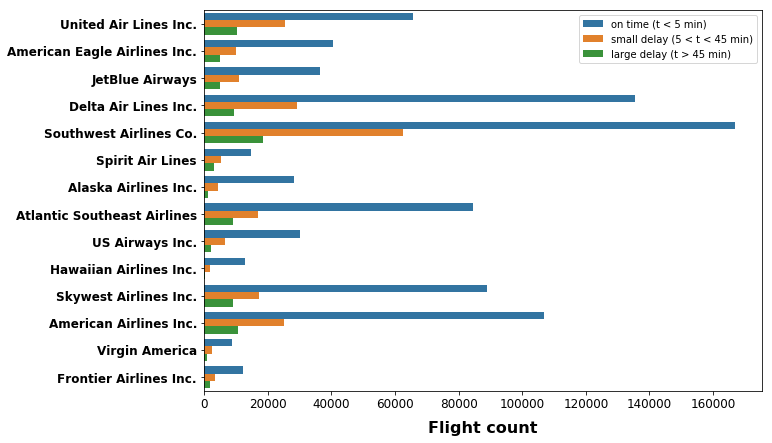

In [73]:
# Function that define different kinds of delay
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)
# We replace the abbreviations by the full names of the companies and set the labels
labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

**Findings**

This figure gives a count of the delays of less than 5 minutes, those in the range 5 < t < 45 min and finally, the delays greater than 45 minutes. Hence, we see that independently of the airline, delays greater than 45 minutes only account for a few percents. However, the proportion of delays in these three groups depends on the airline: as an exemple, in the case of SkyWest Airlines, the delays greater than 45 minutes are only lower by  ∼ 30% with respect to delays in the range 5 < t < 45 min. Things are better for SoutWest Airlines since delays greater than 45 minutes are 4 times less frequent than delays in the range 5 < t < 45 min.